In [112]:
import pandas as pd
import numpy as np

In [113]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [114]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [115]:
df = pd.concat([X, y], axis = 1)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [116]:
df = df.reset_index(drop = True)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [117]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [118]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


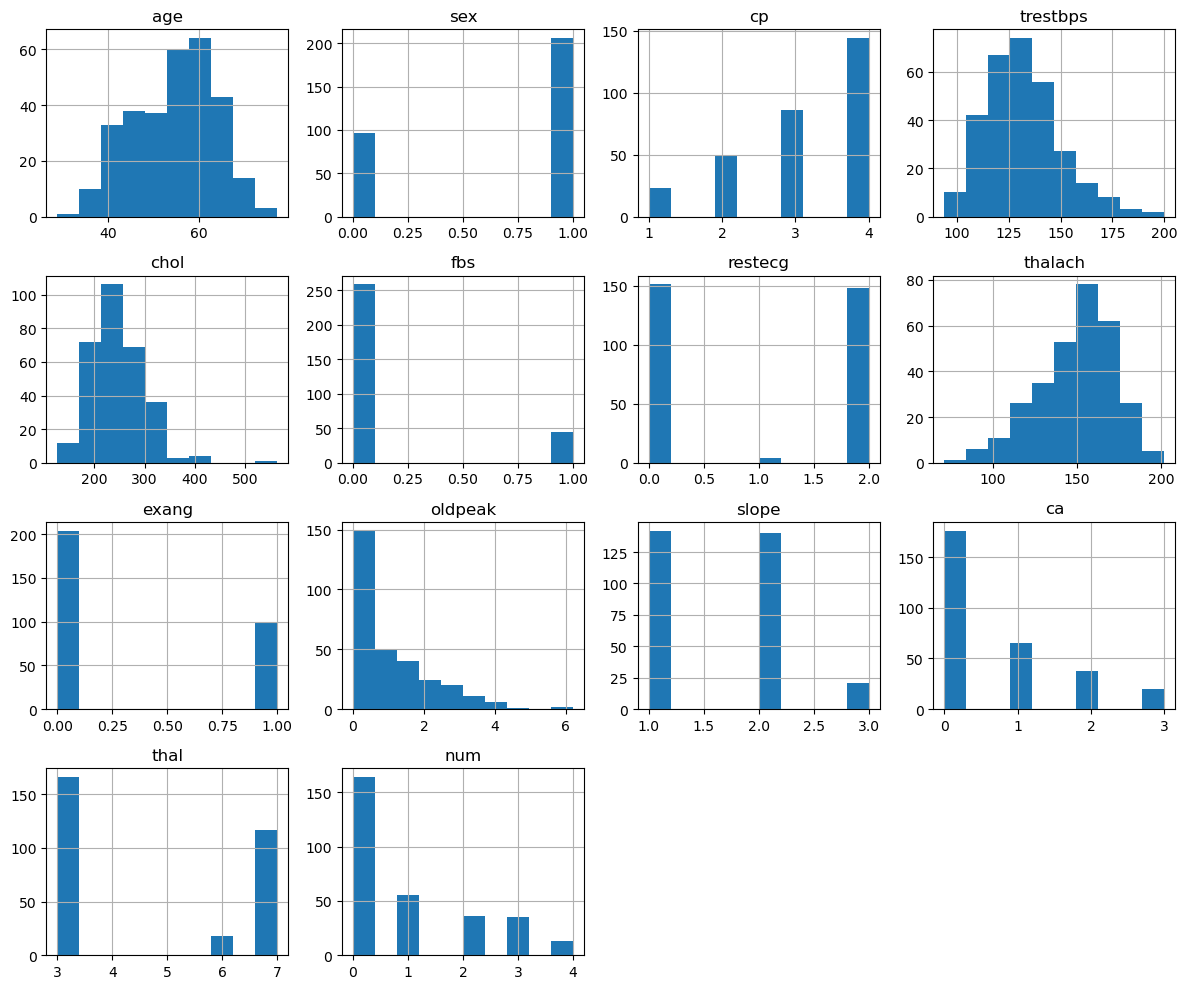

In [119]:
import matplotlib.pyplot as plt

# Simple histogram for all numerical features
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [120]:
df = df.dropna()

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

#Features and target
X = df.drop('num', axis =1)
y = df['num']

#Split data (80% train 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

#Quick check
print('Training set size', X_train.shape)
print('Test set size', X_test.shape)

Training set size (237, 13)
Test set size (60, 13)


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#1. Initialize Scaler
scaler = StandardScaler()

#2. Fit scaler on training data then transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#3. train on scaled data
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train_scaled, y_train)

#4. predict on test data
y_pred = logreg.predict(X_test_scaled)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6166666666666667
Confusion Matrix:
 [[30  1  0  0  1]
 [ 5  4  2  0  0]
 [ 2  1  0  4  0]
 [ 0  0  3  3  1]
 [ 0  1  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.57      0.36      0.44        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.34      0.35      0.34        60
weighted avg       0.58      0.62      0.59        60



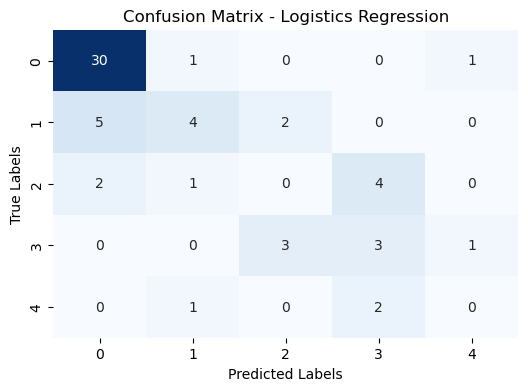

In [123]:
import seaborn as sns

#1. get confusion matrix
cm = confusion_matrix(y_test, y_pred)

#2. Set up plot
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

#3. Add labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistics Regression')
plt.show()

In [124]:
from sklearn.ensemble import RandomForestClassifier

#1. initialize model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

#2.Train model
rf_model.fit(X_train, y_train)

#3. Predict on test data
rf_pred = rf_model.predict(X_test)

#4. Evaluate
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6166666666666667
Confusion Matrix:
 [[30  1  0  0  1]
 [ 5  4  2  0  0]
 [ 2  1  0  4  0]
 [ 0  0  3  3  1]
 [ 0  1  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.57      0.36      0.44        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.34      0.35      0.34        60
weighted avg       0.58      0.62      0.59        60



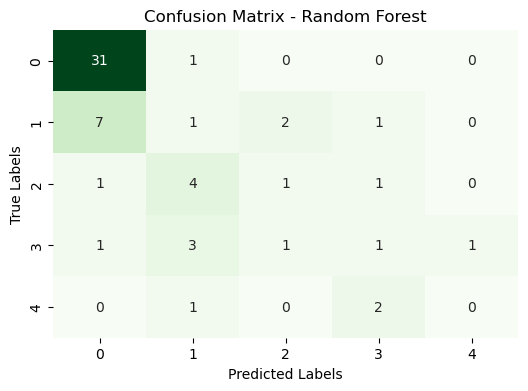

In [125]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

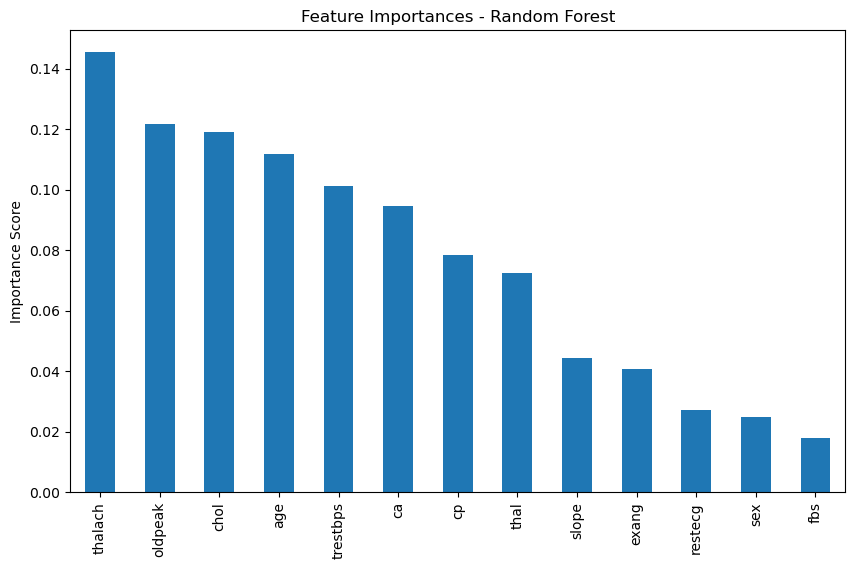

In [126]:
#Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
feature_importances.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance Score')
plt.show()

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression metrics
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred, average='macro')
logreg_recall = recall_score(y_test, y_pred, average='macro')
logreg_f1 = f1_score(y_test, y_pred, average='macro')

# Random Forest metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [logreg_accuracy, rf_accuracy],
    'Precision': [logreg_precision, rf_precision],
    'Recall': [logreg_recall, rf_recall],
    'F1-Score': [logreg_f1, rf_f1]
})

results_df = results_df.set_index('Model')
print(results_df.round(3))

                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression     0.617      0.343   0.346     0.338
Random Forest           0.567      0.265   0.269     0.261


In [128]:
df['target_binary'] = (df['num'] > 0).astype(int)

/var/folders/bt/qm2d_jcd7wsdmfb0k5rx4fpr0000gn/T/ipykernel_5843/1796012744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_binary'] = (df['num'] > 0).astype(int)


In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [130]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Initialize XGBoost model
xgb_model = XGBClassifier(
    objective = 'multi:softmax',   # multiclass classification
    num_class = 5,                 # 5 classes: 0,1,2,3,4
    eval_metric = 'mlogloss',      # multiclass log loss
    random_state = 42
)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Predict on test data
xgb_pred = xgb_model.predict(X_test)

# 4. Evaluate the model
print('XGBoost Accuracy:', accuracy_score(y_test, xgb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, xgb_pred))
print('Classification Report:\n', classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.5666666666666667
Confusion Matrix:
 [[30  1  1  0  0]
 [ 5  3  1  1  1]
 [ 1  3  0  2  1]
 [ 0  5  1  1  0]
 [ 0  2  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.21      0.27      0.24        11
           2       0.00      0.00      0.00         7
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.25      0.27      0.26        60
weighted avg       0.51      0.57      0.53        60



In [131]:
# XGBoost metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='macro')
xgb_recall = recall_score(y_test, xgb_pred, average='macro')
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')

# NOW rebuild your results DataFrame including all three models
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [logreg_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [logreg_precision, rf_precision, xgb_precision],
    'Recall': [logreg_recall, rf_recall, xgb_recall],
    'F1-Score': [logreg_f1, rf_f1, xgb_f1]
})

results_df = results_df.set_index('Model')
print(results_df.round(3))

                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression     0.617      0.343   0.346     0.338
Random Forest           0.567      0.265   0.269     0.261
XGBoost                 0.567      0.250   0.271     0.258


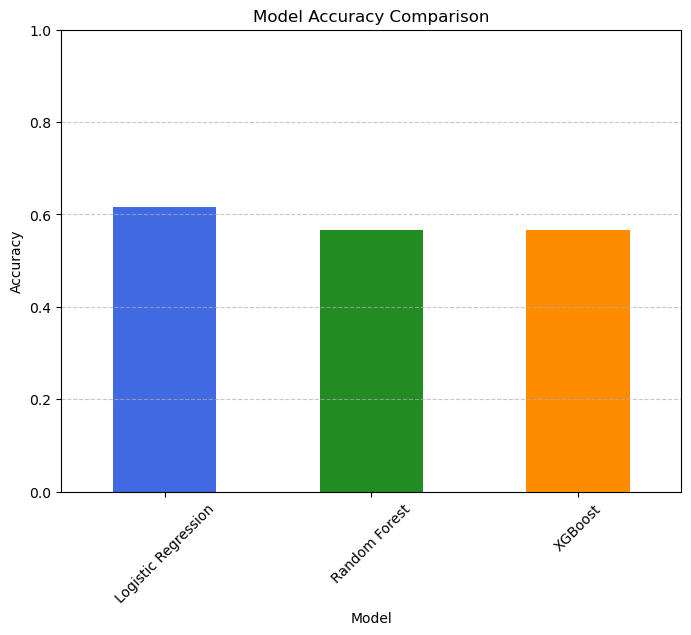

In [132]:
colors = ['royalblue', 'forestgreen', 'darkorange']

plt.figure(figsize=(8,6))
results_df['Accuracy'].plot(kind='bar', color=colors)

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()